In [1]:
import pandas as pd

#Loading the datasets
cab_data = pd.read_csv(r"C:\Users\katki\Datasets\Cab_Data.csv")
customer_data = pd.read_csv(r"C:\Users\katki\Datasets\Customer_ID.csv")
transaction_data = pd.read_csv(r"C:\Users\katki\Datasets\Transaction_ID.csv")
city_data = pd.read_csv(r"C:\Users\katki\Datasets\City.csv")

import datetime #Correcting date format
cab_data["Date of Travel"] = pd.to_datetime(cab_data["Date of Travel"], origin="1899-12-30", unit="D")

#Previewing the first few rows of each dataset
print("Cab Data")
display(cab_data.head())

print("Customer Data")
display(customer_data.head())

print("Transaction ID")
display(transaction_data.head())

print("City Data")
display(city_data.head())


Cab Data


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


Customer Data


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


Transaction ID


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


City Data


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [2]:
import os #Checking working directory
print(os.getcwd())

C:\Users\katki


In [3]:
#Checking column names and data types
for df, name in zip([cab_data, customer_data, transaction_data, city_data],
                    ["Cab Data", "Customer Data", "Transaction Data", "City Data"]):
    print(f"\n{name} - Info")
    print(df.info())


Cab Data - Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB
None

Customer Data - Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-

In [4]:
#Checking for missing values
for df, name in zip([cab_data, customer_data, transaction_data, city_data],
                    ["Cab Data", "Customer Data", "Transaction Data", "City Data"]):
    print(f"\n{name} - Missing Values")
    print(df.isnull().sum())


Cab Data - Missing Values
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

Customer Data - Missing Values
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Transaction Data - Missing Values
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

City Data - Missing Values
City          0
Population    0
Users         0
dtype: int64


In [5]:
#Checking for duplicates
for df, name in zip([cab_data, customer_data, transaction_data, city_data],
                    ["Cab Data", "Customer Data", "Transaction Data", "City Data"]):
    print(f"\n{name} - Duplicate Rows: {df.duplicated().sum()}")


Cab Data - Duplicate Rows: 0

Customer Data - Duplicate Rows: 0

Transaction Data - Duplicate Rows: 0

City Data - Duplicate Rows: 0


In [6]:
#Dropping duplicates
cab_data.drop_duplicates(inplace=True)
customer_data.drop_duplicates(inplace=True)
transaction_data.drop_duplicates(inplace=True)
city_data.drop_duplicates(inplace=True)

In [7]:
#Merging datasets to create a master data
master_data = cab_data.merge(transaction_data, on="Transaction ID") \
                      .merge(customer_data, on="Customer ID") \
                      .merge(city_data, on="City")                        

In [8]:
#Checking the new dataset
print("Master Data Preview")
display(master_data.head())

Master Data Preview


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


In [9]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [10]:
import matplotlib.pyplot as plt

In [11]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import seaborn as sns

In [13]:
#Ride count per company
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

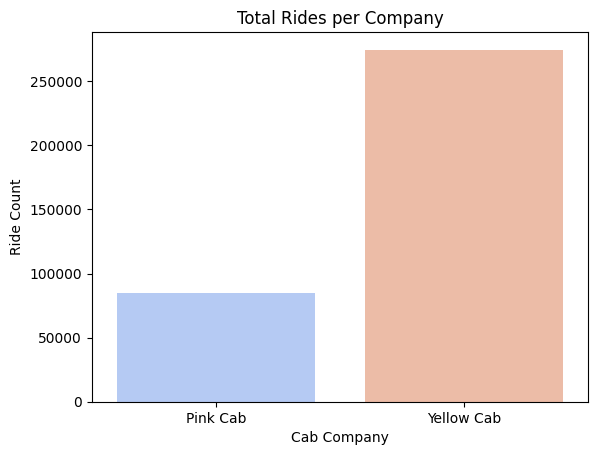

In [14]:
sns.countplot(data=master_data, x="Company", hue="Company", palette="coolwarm", legend=False)

plt.title("Total Rides per Company")
plt.xlabel("Cab Company")
plt.ylabel("Ride Count")
plt.show()

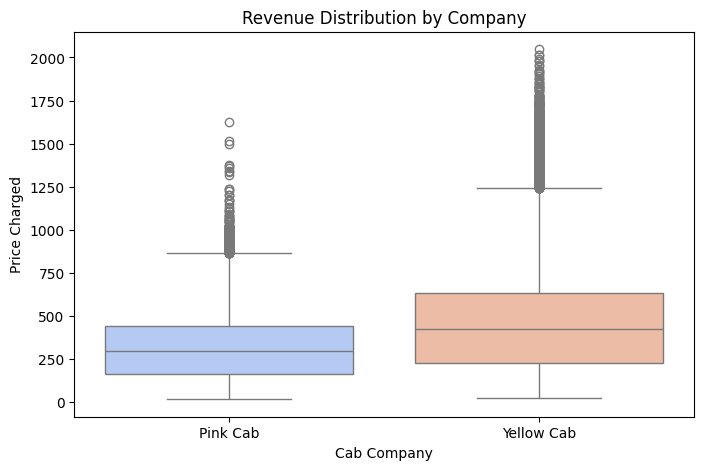

In [15]:
#Revenue comparison
plt.figure(figsize=(8,5))

sns.boxplot(data=master_data, x="Company", y="Price Charged", hue="Company", palette="coolwarm", legend=False)

plt.title("Revenue Distribution by Company")
plt.xlabel("Cab Company")
plt.ylabel("Price Charged")
plt.show()

In [16]:
print(master_data.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users'],
      dtype='object')


In [17]:
master_data.rename(columns={"Date of Travel": "Date"}, inplace=True)

In [18]:
print(cab_data.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')


In [19]:
print(transaction_data.columns)

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')


In [20]:
print(customer_data.columns)

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')


In [21]:
print(city_data.columns)

Index(['City', 'Population', 'Users'], dtype='object')


In [22]:
#Seasonality Trends Analysis--analyzing how cab rides fluctuate across months
master_data["Date"] = pd.to_datetime(master_data["Date"])

In [23]:
#Grouping by month
monthly_trend = master_data.groupby(master_data["Date"].dt.month)["Transaction ID"].count()

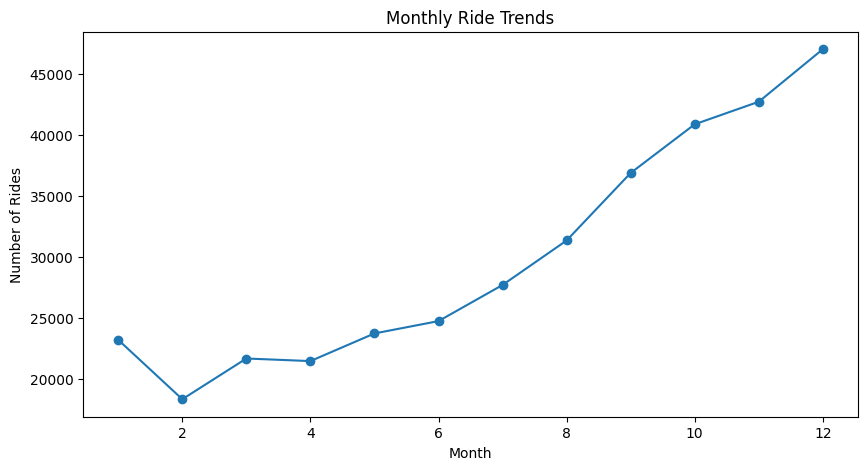

In [24]:
#Plotting monthly trends
plt.figure(figsize=(10,5))
monthly_trend.plot(marker="o", linestyle="-")
plt.title("Monthly Ride Trends")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.show()

In [25]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [26]:
import scipy.stats as stats

In [27]:
#Grouping the ride counts by month
monthly_counts = master_data.groupby(master_data["Date"].dt.month)["Transaction ID"].count()

In [28]:
print(master_data["Date"].dt.month.unique()) #Checking unique months

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [29]:
print(master_data.groupby(master_data["Date"].dt.month)["Transaction ID"].count()) #Counting rides per month

Date
1     23174
2     18307
3     21646
4     21434
5     23701
6     24713
7     27676
8     31323
9     36859
10    40852
11    42700
12    47007
Name: Transaction ID, dtype: int64


In [30]:
master_data["Date"] = pd.to_datetime(master_data["Date"])

In [31]:
monthly_groups = [group["Transaction ID"].values for _, group in master_data.groupby(master_data["Date"].dt.month)]

In [32]:
num_rows = master_data.shape[0] #Total rows
print(f"Total Observations: {num_rows}")

Total Observations: 359392


In [33]:
num_columns = master_data.shape[1] #Total columns
print(f"Total Features: {num_columns}")

Total Features: 14


In [34]:
data_size = master_data.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"Size of Master Data: {data_size:.2f} MB")

Size of Master Data: 137.98 MB


In [35]:
#Overview of Profitability Analysis
#Comparing total revenue, total cost, and total profit betwen Yellow Cab and Pink Cab
#Price vs Cost comparison
cab_data["Profit"] = cab_data["Price Charged"] - cab_data["Cost of Trip"]

In [36]:
display(cab_data.head()) #Viewing first few rows with the new Profit column

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [37]:
profit_summary = cab_data.groupby("Company")["Profit"].agg(["sum", "mean", "count"])
display(profit_summary)

,sum,mean,count
Company,,,
Pink Cab,5.307328e+06,62.652174,84711
Yellow Cab,4.402037e+07,160.259986,274681


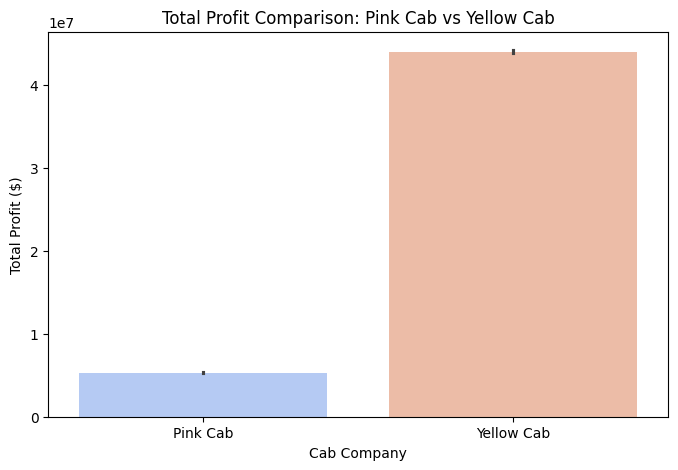

In [38]:
plt.figure(figsize=(8,5))

barplot = sns.barplot(data=cab_data, x="Company", y="Profit", hue="Company", palette="coolwarm", estimator=lambda x:sum(x))

plt.legend([], [], frameon=False)

plt.title("Total Profit Comparison: Pink Cab vs Yellow Cab")
plt.ylabel("Total Profit ($)")
plt.xlabel("Cab Company")
plt.show()

In [39]:
#Overview of Customer Segmentation Analysis-- how customer age and income impact cab choice

#Group by Company to analyse customer characteristics
customer_summary = master_data.groupby("Company").agg(
    Ave_Age=("Age", "mean"),
    Ave_Income=("Income (USD/Month)", "mean")
).reset_index()

display(customer_summary)


,Company,Ave_Age,Ave_Income
0,Pink Cab,35.322414,15059.047137
1,Yellow Cab,35.341112,15045.669817


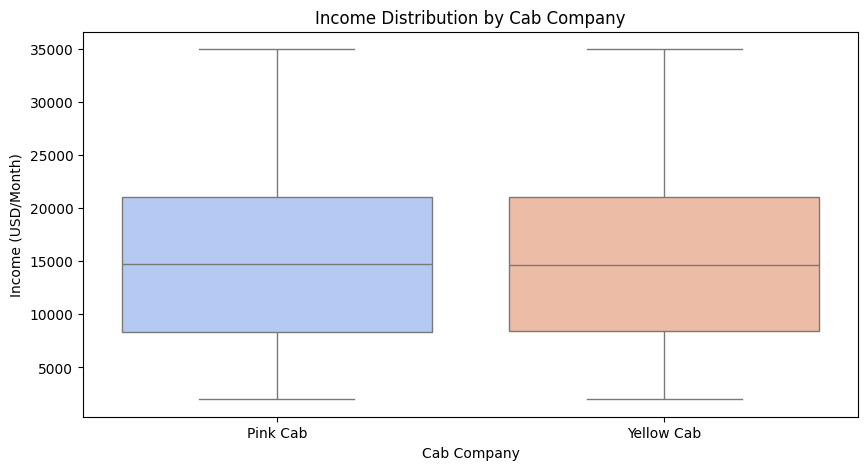

In [40]:
#Income Distribution by Company
plt.figure(figsize=(10,5))
sns.boxplot(data=master_data, x="Company", y="Income (USD/Month)", hue="Company", palette="coolwarm", legend=False)
plt.title("Income Distribution by Cab Company")
plt.xlabel("Cab Company")
plt.ylabel("Income (USD/Month)")
plt.show()

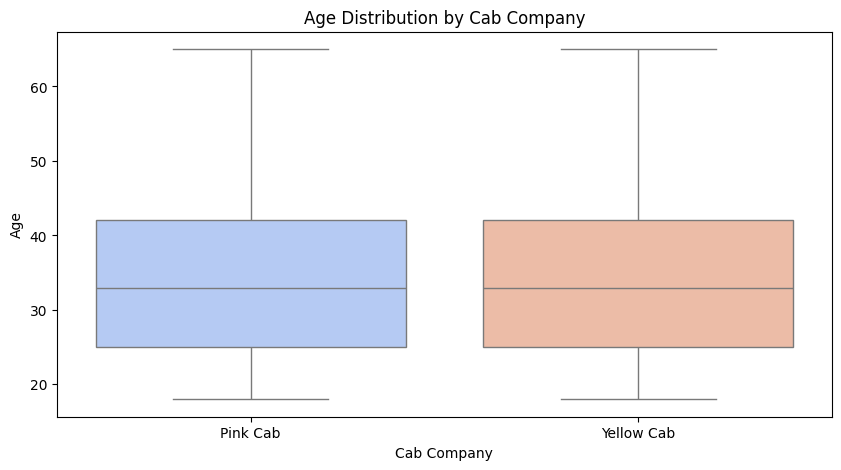

In [41]:
#Age Distribution by Company
plt.figure(figsize=(10,5))
sns.boxplot(data=master_data, x="Company", y="Age", hue="Company", palette="coolwarm", legend=False)
plt.title("Age Distribution by Cab Company")
plt.xlabel("Cab Company")
plt.ylabel("Age")
plt.show()

In [42]:
#City-Based Performance Analysis--which cities generate the most revenue & profit

if "Profit" not in master_data.columns:
    master_data["Profit"] = master_data["Price Charged"] - master_data["Cost of Trip"]

#Group by City to analyze revenue & profit
city_summary = master_data.groupby("City").agg(
    Total_Rides=("Transaction ID", "count"),
    Total_Revenue=("Price Charged", "sum"),
    Total_Profit=("Profit", "sum"),
).reset_index()

#Show Top 10 Cities by Profit
top_cities = city_summary.sort_values("Total_Profit", ascending=False).head(10)

#Reformat Total Profit and Total Revenue for better readability
top_cities["Total_Profit"] = top_cities["Total_Profit"].astype(float)
top_cities["Total_Revenue"] = top_cities["Total_Revenue"].astype(float)

top_cities["Total_Profit"] = top_cities["Total_Profit"].map("{:,.2f}".format)
top_cities["Total_Revenue"] = top_cities["Total_Revenue"].map("{:,.2f}".format)

#Display the data
display(top_cities)

,City,Total_Rides,Total_Revenue,Total_Profit
9,NEW YORK NY,99885,"56,954,061.67","27,962,555.16"
6,LOS ANGELES CA,48033,"17,795,624.41","4,411,708.65"
18,WASHINGTON DC,43737,"16,366,703.83","3,492,870.16"
3,CHICAGO IL,56625,"19,841,318.52","3,387,313.41"
2,BOSTON MA,29692,"10,359,755.42","1,768,719.27"
14,SAN DIEGO CA,20488,"7,136,380.59","1,587,163.47"
16,SILICON VALLEY,8519,"3,684,102.15","1,316,705.27"
4,DALLAS TX,7017,"3,142,429.91","1,128,733.27"
0,ATLANTA GA,7557,"2,980,241.72","842,432.88"
7,MIAMI FL,6454,"2,580,135.20","758,301.24"


In [43]:
#Convert Total_Profit to float in case it is formatted as a string
top_cities["Total Profit"] = top_cities["Total_Profit"].replace({",":""}, regex=True).astype(float)

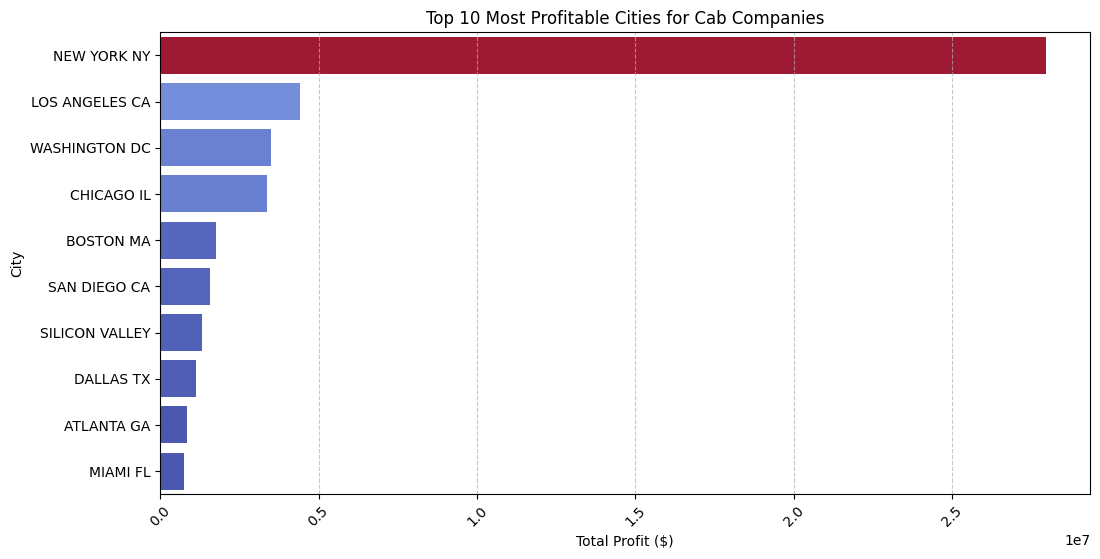

In [44]:
#Plotting bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=top_cities, x="Total Profit", y="City", hue="Total Profit", palette="coolwarm", legend=False)
plt.title("Top 10 Most Profitable Cities for Cab Companies")
plt.xlabel("Total Profit ($)")
plt.ylabel("City")
plt.xticks(rotation=45)
plt.grid(axis="x", linestyle="--", alpha=0.7)

#Show chart
plt.show()

In [45]:
#5-7 hypothesis' that my coding helped show
#1. Yellow Cab generates higher revenue and profit than Pink Cab
#2. High-Income customers prefer Yellow Cab over Pink Cab
#3. Cab demand is higher during specific months due to seasonality
#4. New York, Los Angeles, & Washington DC are the most profitable markets
#5. Longer trips generate higher profits for the cab companies
#6. Customers prefer credit cards over cash for payment
#7. Customer age influence ride preference